# Bot Extension Analysis

## Imports

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from extension_utils import (extension_reading_and_cleaning, gen_avg_investments, extension_merge_game_and_instrucs,
                             extension_merge_game_and_survey, calculate_and_plot_averages,
                             perform_t_tests, perform_non_parametric_tests,
                             plot_averages_all,
                             test_investment_difference_by_round_corrected,
                             calculate_averages,
                             encode_group_investments, encode_additional_group_investments)

## Load Data

In [2]:
extension_data_week_one_bg = extension_reading_and_cleaning('/Users/aaronberman/Desktop/DA_4_MGPGG/src/extension/bots_data/bots_shared_rounds_nov3.csv')
extension_data_week_two_bg = extension_reading_and_cleaning('/Users/aaronberman/Desktop/DA_4_MGPGG/src/extension/bots_data/final/bots_shared_2023-11-19.csv')
all_gb_data = extension_reading_and_cleaning('/Users/aaronberman/Desktop/DA_4_MGPGG/src/extension/bots_data/week_two/bots_shared_flipped_2023-11-10.csv')

In [3]:
#extension_data_week_one_bg
#extension_data_week_two_bg
#all_gb_data

In [4]:
# Combine Blue-Green Screen data and add binary column showing this 'treatment' // control

all_bg_data = pd.concat([extension_data_week_one_bg, extension_data_week_two_bg], ignore_index=True)
all_bg_data['blue_green'] = True

# 0 for the green-blue df

all_gb_data['blue_green'] = False

# combine the two bg and gb data frame

mgpgg_extension_df = pd.concat([all_bg_data, all_gb_data], ignore_index=True)
#mgpgg_extension_df

In [5]:
# Add instructions

extension_week_one_instrucs_bg = extension_reading_and_cleaning('/Users/aaronberman/Desktop/DA_4_MGPGG/src/extension/bots_data/bots_shared_instrucs_nov3.csv')
extension_week_two_instrucs_bg = extension_reading_and_cleaning('/Users/aaronberman/Desktop/DA_4_MGPGG/src/extension/bots_data/final/bots_shared_instrucs_2023-11-19.csv')
all_gb_df = extension_reading_and_cleaning('/Users/aaronberman/Desktop/DA_4_MGPGG/src/extension/bots_data/week_two/bots_shared_flipped_instrucs_2023-11-10.csv')

mgpgg_extension_instrucs_df = pd.concat([extension_week_one_instrucs_bg, extension_week_two_instrucs_bg, all_gb_df], ignore_index=True)
#mgpgg_extension_instrucs_df

In [6]:
# Combine treatment and instruc data

mgpgg_extension_game_and_instrucs_df = extension_merge_game_and_instrucs(mgpgg_extension_df, mgpgg_extension_instrucs_df)
#mgpgg_extension_game_and_instrucs_df

In [7]:
# Add survey q answers

extension_survey_week_one_df = extension_reading_and_cleaning('/Users/aaronberman/Desktop/DA_4_MGPGG/src/extension/bots_data/bots_multi_survey_nov3.csv')
extension_survey_week_two_bg_df = extension_reading_and_cleaning('/Users/aaronberman/Desktop/DA_4_MGPGG/src/extension/bots_data/final/bots_multi_survey_2023-11-19.csv')
extension_survey_week_two_gb_df = extension_reading_and_cleaning('/Users/aaronberman/Desktop/DA_4_MGPGG/src/extension/bots_data/week_two/bots_multi_flipped_survey_2023-11-10.csv')

extension_survey_df = pd.concat([extension_survey_week_one_df, extension_survey_week_two_bg_df, extension_survey_week_two_gb_df], ignore_index=True)

mgpgg_extension_all_df = extension_merge_game_and_survey(mgpgg_extension_game_and_instrucs_df, extension_survey_df)
mgpgg_extension_all_df['bots'] = True
#mgpgg_extension_all_df

In [8]:
mgpgg_extension_all_df
mgpgg_extension_all_df.to_csv('mgpgg_extension_all_data.csv', index=False)

## Avg Human Investments

In [9]:
avg_investments = gen_avg_investments(mgpgg_extension_all_df)

In [10]:
avg_investments

{'treatment': 'shared',
 'avg_blue_investment': 5.31171875,
 'std_blue': 4.731957149697721,
 'avg_green_investment': 5.73984375,
 'std_green': 4.86602106848062,
 'avg_blue_true': 5.44375,
 'std_blue_true': 4.569747256069048,
 'avg_green_true': 5.3984375,
 'std_green_true': 4.621410071028207,
 'avg_blue_false': 5.1796875,
 'std_blue_false': 4.8888003875454435,
 'avg_green_false': 6.08125,
 'std_green_false': 5.079612661289487}

## One Session Better vs Work Group Plot

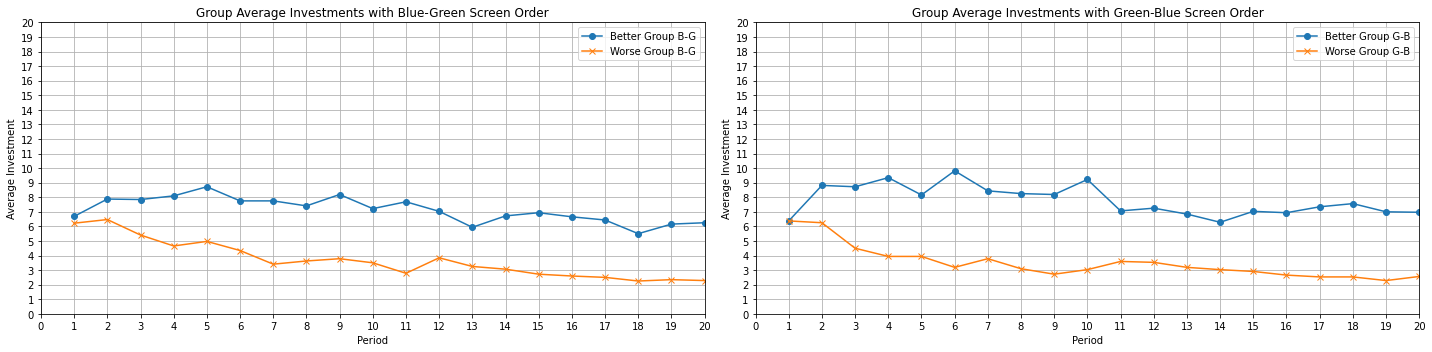

In [11]:
calculate_and_plot_averages(mgpgg_extension_all_df)

## TTest to combine standard and flipped

In [12]:
t_test_results = perform_t_tests(mgpgg_extension_all_df)
print(t_test_results)

{'t_test_better': Ttest_indResult(statistic=-2.133266857286174, pvalue=0.03966480570387229), 't_test_worse': Ttest_indResult(statistic=0.5746632671282222, pvalue=0.5689610442680991)}


In [13]:
wilcoxon_u_results = perform_non_parametric_tests(mgpgg_extension_all_df)
print(wilcoxon_u_results)

{'u_test_better': {'statistic': 130.0, 'p_value': 0.06005055493509417}, 'u_test_worse': {'statistic': 215.5, 'p_value': 0.6848273779537117}}


## Here and below consider data as ONE set 
- (flipped == standard) aka ignore screen 'treatment'

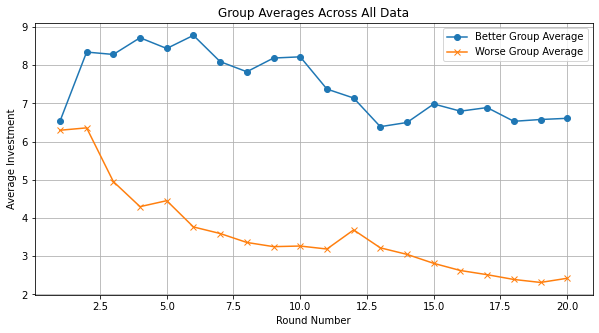

In [14]:
plot_averages_all(mgpgg_extension_all_df)

## Import Shared MAIN experiment data

In [15]:
mgpgg_shared_df = pd.read_csv('/Users/aaronberman/Desktop/DA_4_MGPGG/src/Treatment/shared_all_df.csv', index_col=0)
mgpgg_shared_df['bots'] = False
mgpgg_shared_df

,participant.id_in_session,participant.code,participant.payoff,player.id_in_group,player.payoff,player.blue_group_partner_one_id,player.blue_group_partner_two_id,player.blue_group_partner_three_id,player.blue_group_total_investment,player.blue_group_individual_share,...,player.num_errors_q_three_a_shared,player.num_errors_q_three_b_shared,player.num_errors_q_four_a_shared,player.num_errors_q_four_b_shared,player.num_errors_q_four_c_shared,player.num_errors_q_four_d_shared,Shared,Split,Single,bots
0,1,znlu9jpg,841.0,1,27.0,2.0,3.0,4.0,25.0,13.0,...,0,0,1,0,0,0,True,False,False,False
1,1,znlu9jpg,841.0,1,25.0,2.0,3.0,4.0,35.0,18.0,...,0,0,1,0,0,0,True,False,False,False
2,1,znlu9jpg,841.0,1,26.0,2.0,3.0,4.0,30.0,15.0,...,0,0,1,0,0,0,True,False,False,False
3,1,znlu9jpg,841.0,1,27.0,2.0,3.0,4.0,29.0,15.0,...,0,0,1,0,0,0,True,False,False,False
4,1,znlu9jpg,841.0,1,28.0,2.0,3.0,4.0,27.0,14.0,...,0,0,1,0,0,0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,16,w9zef9ad,939.0,16,31.0,13.0,14.0,15.0,24.0,12.0,...,0,0,0,0,0,0,True,False,False,False
1596,16,w9zef9ad,939.0,16,30.0,13.0,14.0,15.0,23.0,12.0,...,0,0,0,0,0,0,True,False,False,False
1597,16,w9zef9ad,939.0,16,33.0,13.0,14.0,15.0,26.0,13.0,...,0,0,0,0,0,0,True,False,False,False
1598,16,w9zef9ad,939.0,16,29.0,13.0,14.0,15.0,26.0,13.0,...,0,0,0,0,0,0,True,False,False,False


### Reconstruction Min's and Max's

In [16]:
# construct min and max group investment for each player in each period 

mgpgg_shared_df['player.max_invest'] = np.where(mgpgg_shared_df['player.blue_group_investment'] > mgpgg_shared_df['player.green_group_investment'], 
                                        mgpgg_shared_df['player.blue_group_investment'], 
                                        mgpgg_shared_df['player.green_group_investment'])

mgpgg_shared_df['player.min_invest'] = np.where(mgpgg_shared_df['player.blue_group_investment'] < mgpgg_shared_df['player.green_group_investment'], 
                                        mgpgg_shared_df['player.blue_group_investment'], 
                                        mgpgg_shared_df['player.green_group_investment'])

In [17]:
mgpgg_shared_df['max_invest_group'] = np.where(
    mgpgg_shared_df['player.blue_group_investment'] > mgpgg_shared_df['player.green_group_investment'], 
    'blue', 
    'green'
)

mgpgg_shared_df['group_max_invest'] = np.where(
    mgpgg_shared_df['max_invest_group'] == 'blue',
    mgpgg_shared_df['player.blue_group_total_investment'],
    mgpgg_shared_df['player.green_group_total_investment']
)

mgpgg_shared_df['min_invest_group'] = np.where(
    mgpgg_shared_df['player.blue_group_investment'] > mgpgg_shared_df['player.green_group_investment'], 
    'green', 
    'blue'
)

mgpgg_shared_df['group_min_invest'] = np.where(
    mgpgg_shared_df['min_invest_group'] == 'blue',
    mgpgg_shared_df['player.blue_group_total_investment'],
    mgpgg_shared_df['player.green_group_total_investment']
)

In [18]:
main_avg_max = mgpgg_shared_df[mgpgg_shared_df['bots'] == False].groupby('subsession.round_number')['player.max_invest'].mean()
main_avg_min = mgpgg_shared_df[mgpgg_shared_df['bots'] == False].groupby('subsession.round_number')['player.min_invest'].mean()

#### Construct Min/Max for Extension data (as a check for robustness of the better / worse group)

In [19]:
copy_mgpgg_extension_all_df = mgpgg_extension_all_df.copy()

# construct min and max group investment for each player in each period 

copy_mgpgg_extension_all_df['player.max_invest'] = np.where(copy_mgpgg_extension_all_df['player.blue_group_investment'] > copy_mgpgg_extension_all_df['player.green_group_investment'], 
                                        copy_mgpgg_extension_all_df['player.blue_group_investment'], 
                                        copy_mgpgg_extension_all_df['player.green_group_investment'])

copy_mgpgg_extension_all_df['player.min_invest'] = np.where(copy_mgpgg_extension_all_df['player.blue_group_investment'] < copy_mgpgg_extension_all_df['player.green_group_investment'], 
                                        copy_mgpgg_extension_all_df['player.blue_group_investment'], 
                                        copy_mgpgg_extension_all_df['player.green_group_investment'])

copy_mgpgg_extension_all_df['max_invest_group'] = np.where(
    copy_mgpgg_extension_all_df['player.blue_group_investment'] > copy_mgpgg_extension_all_df['player.green_group_investment'], 
    'blue', 
    'green'
)

copy_mgpgg_extension_all_df['group_max_invest'] = np.where(
    copy_mgpgg_extension_all_df['max_invest_group'] == 'blue',
    copy_mgpgg_extension_all_df['player.blue_group_total_investment'],
    copy_mgpgg_extension_all_df['player.green_group_total_investment']
)

copy_mgpgg_extension_all_df['min_invest_group'] = np.where(
    copy_mgpgg_extension_all_df['player.blue_group_investment'] > copy_mgpgg_extension_all_df['player.green_group_investment'], 
    'green', 
    'blue'
)

copy_mgpgg_extension_all_df['group_min_invest'] = np.where(
    copy_mgpgg_extension_all_df['min_invest_group'] == 'blue',
    copy_mgpgg_extension_all_df['player.blue_group_total_investment'],
    copy_mgpgg_extension_all_df['player.green_group_total_investment']
)

extension_avg_max = copy_mgpgg_extension_all_df[copy_mgpgg_extension_all_df['bots'] == True].groupby('subsession.round_number')['player.max_invest'].mean()
extension_avg_min = copy_mgpgg_extension_all_df[copy_mgpgg_extension_all_df['bots'] == True].groupby('subsession.round_number')['player.min_invest'].mean()

In [20]:
copy_better_group_averages, copy_worse_group_averages = calculate_averages(copy_mgpgg_extension_all_df)

([<matplotlib.axis.XTick at 0x7f9ff138a760>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

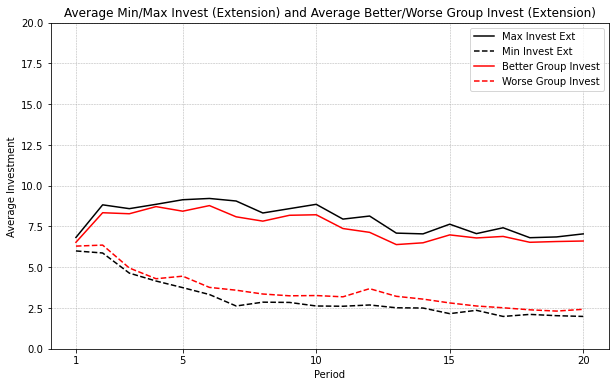

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(extension_avg_max, label='Max Invest Ext', color='black', linestyle='-')
plt.plot(extension_avg_min, label='Min Invest Ext', color='black', linestyle='--')
plt.plot(copy_better_group_averages, label='Better Group Invest', color='red', linestyle = '-')
plt.plot(copy_worse_group_averages, label='Worse Group Invest', color='red', linestyle='--')
plt.title('Average Min/Max Invest (Extension) and Average Better/Worse Group Invest (Extension)')
plt.xlabel('Period')
plt.ylabel('Average Investment')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(0,20)
# Adjust x-axis to show only whole numbers
plt.xticks([1, 5, 10, 15, 20])

### Plot Min / Max Invest from MAIN against EXTENSION

In [22]:
better_group_averages, worse_group_averages = calculate_averages(mgpgg_extension_all_df)

([<matplotlib.axis.XTick at 0x7f9fd3817d30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

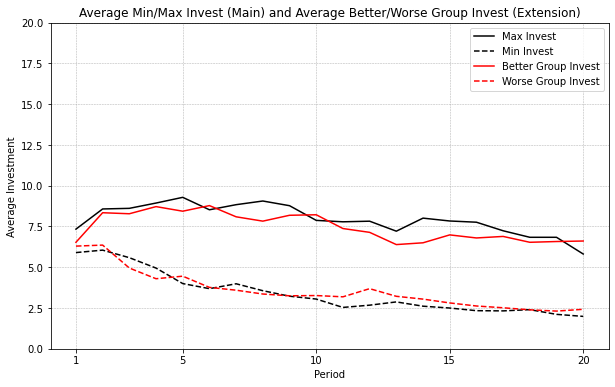

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(main_avg_max, label='Max Invest', color='black', linestyle='-')
plt.plot(main_avg_min, label='Min Invest', color='black', linestyle='--')
plt.plot(better_group_averages, label='Better Group Invest', color='red', linestyle = '-')
plt.plot(worse_group_averages, label='Worse Group Invest', color='red', linestyle='--')
plt.title('Average Min/Max Invest (Main) and Average Better/Worse Group Invest (Extension)')
plt.xlabel('Period')
plt.ylabel('Average Investment')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(0,20)
# Adjust x-axis to show only whole numbers
plt.xticks([1, 5, 10, 15, 20])

### Normal Groupings (Main) | Better Worse (Ext)

In [24]:
blue_inv_avg = mgpgg_shared_df[mgpgg_shared_df['bots'] == False].groupby('subsession.round_number')['player.blue_group_investment'].mean()
green_inv_avg = mgpgg_shared_df[mgpgg_shared_df['bots'] == False].groupby('subsession.round_number')['player.green_group_investment'].mean()

([<matplotlib.axis.XTick at 0x7f9ff13094c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

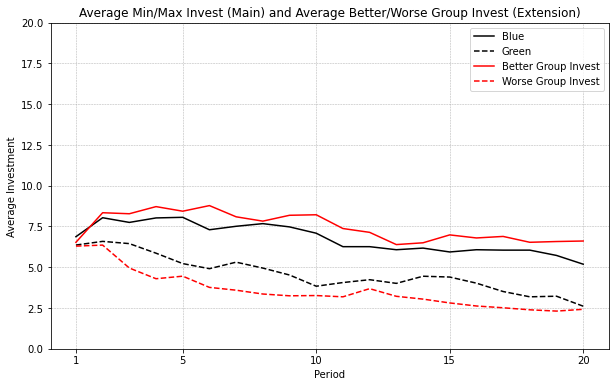

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(blue_inv_avg, label='Blue', color='black', linestyle='-')
plt.plot(green_inv_avg, label='Green', color='black', linestyle='--')
plt.plot(better_group_averages, label='Better Group Invest', color='red', linestyle = '-')
plt.plot(worse_group_averages, label='Worse Group Invest', color='red', linestyle='--')
plt.title('Average Min/Max Invest (Main) and Average Better/Worse Group Invest (Extension)')
plt.xlabel('Period')
plt.ylabel('Average Investment')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(0,20)
# Adjust x-axis to show only whole numbers
plt.xticks([1, 5, 10, 15, 20])

### Compare min max both

([<matplotlib.axis.XTick at 0x7f9ff1515af0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

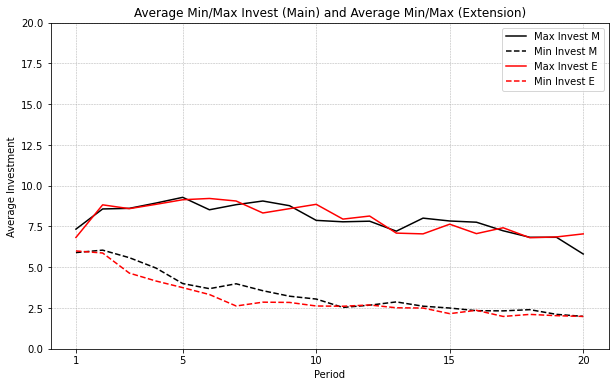

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(main_avg_max, label='Max Invest M', color='black', linestyle='-')
plt.plot(main_avg_min, label='Min Invest M', color='black', linestyle='--')
plt.plot(extension_avg_max, label='Max Invest E', color='red', linestyle='-')
plt.plot(extension_avg_min, label='Min Invest E', color='red', linestyle='--')
plt.title('Average Min/Max Invest (Main) and Average Min/Max (Extension)')
plt.xlabel('Period')
plt.ylabel('Average Investment')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(0,20)
# Adjust x-axis to show only whole numbers
plt.xticks([1, 5, 10, 15, 20])

### Combine Data Sets for Regression Analysis (in Stata)

In [27]:
mgpgg_shared_df.rename(columns={
    'player.comprehension_question_one_shared': 'player.comprehension_question_one',
    'player.comprehension_question_two_shared': 'player.comprehension_question_two',
    'player.comprehension_question_three_a_shared': 'player.comprehension_question_three_a',
    'player.comprehension_question_three_b_shared': 'player.comprehension_question_three_b',
    'player.comprehension_question_four_a_shared': 'player.comprehension_question_four_a',
    'player.comprehension_question_four_b_shared': 'player.comprehension_question_four_b',
    'player.comprehension_question_four_c_shared': 'player.comprehension_question_four_c',
    'player.comprehension_question_four_d_shared': 'player.comprehension_question_four_d',
    'player.time_to_answer_treatment_instrucs': 'player.time_to_answer',
    'player.start_time_treatment_instrucs': 'player.start_time',
    'player.time_spent_instrucs_treatment': 'player.time_spent_instrucs',
    'player.time_spent_q_one_treatment': 'player.time_spent_q_one',
    'player.time_spent_q_two_treatment': 'player.time_spent_q_two',
    'player.time_spent_q_three_treatment': 'player.time_spent_q_three',
    'player.time_spent_q_four_treatment': 'player.time_spent_q_four',
    'player.num_errors_q_one_shared': 'player.num_errors_q_one',
    'player.num_errors_q_two_shared': 'player.num_errors_q_two',
    'player.num_errors_q_three_a_shared': 'player.num_errors_q_three_a',
    'player.num_errors_q_three_b_shared': 'player.num_errors_q_three_b',
    'player.num_errors_q_four_a_shared': 'player.num_errors_q_four_a',
    'player.num_errors_q_four_b_shared': 'player.num_errors_q_four_b',
    'player.num_errors_q_four_c_shared': 'player.num_errors_q_four_c',
    'player.num_errors_q_four_d_shared': 'player.num_errors_q_four_d',
    'player.max_invest': 'player.better_group_investment',
    'player.min_invest': 'player.worse_group_investment',
    'group_max_invest': 'player.better_group_total_investment',
    'group_min_invest': 'player.worse_group_total_investment',
    'max_invest_group': 'better_group',
    'min_invest_group': 'worse_group'
    
}, inplace=True)

### Encode 'min' and 'max' column for extension

In [28]:
mgpgg_shared_df

,participant.id_in_session,participant.code,participant.payoff,player.id_in_group,player.payoff,player.blue_group_partner_one_id,player.blue_group_partner_two_id,player.blue_group_partner_three_id,player.blue_group_total_investment,player.blue_group_individual_share,...,Shared,Split,Single,bots,player.better_group_investment,player.worse_group_investment,better_group,player.better_group_total_investment,worse_group,player.worse_group_total_investment
0,1,znlu9jpg,841.0,1,27.0,2.0,3.0,4.0,25.0,13.0,...,True,False,False,False,7.0,7.0,green,16.0,blue,25.0
1,1,znlu9jpg,841.0,1,25.0,2.0,3.0,4.0,35.0,18.0,...,True,False,False,False,13.0,5.0,blue,35.0,green,10.0
2,1,znlu9jpg,841.0,1,26.0,2.0,3.0,4.0,30.0,15.0,...,True,False,False,False,13.0,2.0,blue,30.0,green,11.0
3,1,znlu9jpg,841.0,1,27.0,2.0,3.0,4.0,29.0,15.0,...,True,False,False,False,10.0,2.0,blue,29.0,green,8.0
4,1,znlu9jpg,841.0,1,28.0,2.0,3.0,4.0,27.0,14.0,...,True,False,False,False,7.0,1.0,blue,27.0,green,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,16,w9zef9ad,939.0,16,31.0,13.0,14.0,15.0,24.0,12.0,...,True,False,False,False,8.0,7.0,green,27.0,blue,24.0
1596,16,w9zef9ad,939.0,16,30.0,13.0,14.0,15.0,23.0,12.0,...,True,False,False,False,8.0,8.0,green,28.0,blue,23.0
1597,16,w9zef9ad,939.0,16,33.0,13.0,14.0,15.0,26.0,13.0,...,True,False,False,False,8.0,6.0,green,27.0,blue,26.0
1598,16,w9zef9ad,939.0,16,29.0,13.0,14.0,15.0,26.0,13.0,...,True,False,False,False,8.0,8.0,green,24.0,blue,26.0


In [29]:
mgpgg_extension_all_df.columns

Index(['participant.id_in_session', 'participant.code', 'participant.payoff',
       'player.id_in_group', 'player.payoff',
       'player.blue_group_human_partner', 'player.green_group_human_partner',
       'player.blue_group_total_investment',
       'player.blue_group_individual_share',
       'player.green_group_total_investment',
       'player.green_group_individual_share', 'player.blue_group_profit',
       'player.green_group_profit', 'player.personal_account',
       'player.blue_group_investment', 'player.green_group_investment',
       'player.blue_bot_one_investment', 'player.blue_bot_two_investment',
       'player.green_bot_one_investment', 'player.green_bot_two_investment',
       'player.start_time', 'player.time_spent_invest',
       'player.time_spent_results', 'player.time_spent_cumulative_results',
       'player.num_errors_invest', 'group.id_in_subsession',
       'subsession.round_number', 'session.code', 'session.is_demo',
       'blue_green', 'player.comprehens

In [30]:
mgpgg_extension_all_df = encode_group_investments(mgpgg_extension_all_df)
mgpgg_extension_all_df = encode_additional_group_investments(mgpgg_extension_all_df)
mgpgg_extension_all_df

,participant.id_in_session,participant.code,participant.payoff,player.id_in_group,player.payoff,player.blue_group_human_partner,player.green_group_human_partner,player.blue_group_total_investment,player.blue_group_individual_share,player.green_group_total_investment,...,player.time_spent_survey_four,bots,player.better_group_investment,player.worse_group_investment,better_group,worse_group,player.better_group_total_investment,player.worse_group_total_investment,player.better_group_bot_investment,player.worse_group_bot_investment
0,1,reaj0cas,610.0,1,25.0,2.0,3.0,17.0,9.0,31.0,...,25.080155,True,10.0,10.0,green,blue,31.0,17.0,18.0,2.0
1,1,reaj0cas,610.0,1,30.0,2.0,3.0,16.0,8.0,32.0,...,25.080155,True,7.0,7.0,green,blue,32.0,16.0,17.0,2.0
2,1,reaj0cas,610.0,1,31.0,2.0,3.0,9.0,5.0,32.0,...,25.080155,True,5.0,5.0,green,blue,32.0,9.0,18.0,0.0
3,1,reaj0cas,610.0,1,29.0,2.0,3.0,9.0,5.0,31.0,...,25.080155,True,6.0,6.0,green,blue,31.0,9.0,18.0,0.0
4,1,reaj0cas,610.0,1,27.0,2.0,3.0,26.0,13.0,27.0,...,25.080155,True,0.0,20.0,green,blue,27.0,26.0,18.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,8,w2s587fz,616.0,8,35.0,7.0,6.0,27.0,14.0,15.0,...,27.124380,True,2.0,5.0,blue,green,27.0,15.0,16.0,0.0
1276,8,w2s587fz,616.0,8,31.0,7.0,6.0,28.0,14.0,5.0,...,27.124380,True,1.0,5.0,blue,green,28.0,5.0,17.0,0.0
1277,8,w2s587fz,616.0,8,31.0,7.0,6.0,26.0,13.0,7.0,...,27.124380,True,1.0,5.0,blue,green,26.0,7.0,17.0,1.0
1278,8,w2s587fz,616.0,8,31.0,7.0,6.0,26.0,13.0,6.0,...,27.124380,True,0.0,5.0,blue,green,26.0,6.0,18.0,0.0


## Combine Extension & Main df for Stata Regressions


In [31]:
# Combine the shared EXTENSION data and shared MAIN data

mgpgg_extension_all_df.reset_index(drop=True, inplace=True)
mgpgg_shared_df.reset_index(drop=True, inplace=True)

# Save to CSV and read back
mgpgg_extension_all_df.to_csv('mgpgg_extension_all_df.csv', index=False)
mgpgg_shared_df.to_csv('mgpgg_shared_df.csv', index=False)

# Read back
mgpgg_extension_all_df = pd.read_csv('mgpgg_extension_all_df.csv')
mgpgg_shared_df = pd.read_csv('mgpgg_shared_df.csv')

# Concatenate again
mgpgg_shared_extension_and_main_df = pd.concat([mgpgg_extension_all_df, mgpgg_shared_df], ignore_index=True)


In [32]:
mgpgg_shared_extension_and_main_df

,participant.id_in_session,participant.code,participant.payoff,player.id_in_group,player.payoff,player.blue_group_human_partner,player.green_group_human_partner,player.blue_group_total_investment,player.blue_group_individual_share,player.green_group_total_investment,...,player.blue_group_partner_two_id,player.blue_group_partner_three_id,player.green_group_partner_one_id,player.green_group_partner_two_id,player.green_group_partner_three_id,player.time_to_answer,player.start_time.1,Shared,Split,Single
0,1,reaj0cas,610.0,1,25.0,2.0,3.0,17.0,9.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,reaj0cas,610.0,1,30.0,2.0,3.0,16.0,8.0,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,reaj0cas,610.0,1,31.0,2.0,3.0,9.0,5.0,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,reaj0cas,610.0,1,29.0,2.0,3.0,9.0,5.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,reaj0cas,610.0,1,27.0,2.0,3.0,26.0,13.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,16,w9zef9ad,939.0,16,31.0,NaN,NaN,24.0,12.0,27.0,...,14.0,15.0,4.0,8.0,12.0,1.695932e+09,1.695931e+09,True,False,False
2876,16,w9zef9ad,939.0,16,30.0,NaN,NaN,23.0,12.0,28.0,...,14.0,15.0,4.0,8.0,12.0,1.695932e+09,1.695931e+09,True,False,False
2877,16,w9zef9ad,939.0,16,33.0,NaN,NaN,26.0,13.0,27.0,...,14.0,15.0,4.0,8.0,12.0,1.695932e+09,1.695931e+09,True,False,False
2878,16,w9zef9ad,939.0,16,29.0,NaN,NaN,26.0,13.0,24.0,...,14.0,15.0,4.0,8.0,12.0,1.695932e+09,1.695931e+09,True,False,False


## Prepare Combined Data for Stata
- get rid of '.' in column names
- shorten column names
- Drop 'dead' columns
- save to csv

In [33]:
cols = mgpgg_shared_extension_and_main_df.columns.to_list()
cols

['participant.id_in_session',
 'participant.code',
 'participant.payoff',
 'player.id_in_group',
 'player.payoff',
 'player.blue_group_human_partner',
 'player.green_group_human_partner',
 'player.blue_group_total_investment',
 'player.blue_group_individual_share',
 'player.green_group_total_investment',
 'player.green_group_individual_share',
 'player.blue_group_profit',
 'player.green_group_profit',
 'player.personal_account',
 'player.blue_group_investment',
 'player.green_group_investment',
 'player.blue_bot_one_investment',
 'player.blue_bot_two_investment',
 'player.green_bot_one_investment',
 'player.green_bot_two_investment',
 'player.start_time',
 'player.time_spent_invest',
 'player.time_spent_results',
 'player.time_spent_cumulative_results',
 'player.num_errors_invest',
 'group.id_in_subsession',
 'subsession.round_number',
 'session.code',
 'session.is_demo',
 'blue_green',
 'player.comprehension_question_one',
 'player.comprehension_question_two',
 'player.comprehension_q

In [34]:
mgpgg_shared_extension_and_main_df.drop(columns=['player.start_time', 'session.is_demo','player.password_to_start','player.start_time.1','Shared','Split','Single', 'player.blue_group_profit', 'player.green_group_profit'], inplace=True)

In [35]:
rename_dict = {
    'participant.id_in_session': 'participant_id',
    'participant.code': 'participant_code',
    'participant.payoff': 'payoff',
    'player.id_in_group': 'id_in_group',
    'player.payoff': 'period_payoff',
    'player.blue_group_human_partner': 'blue_human_part_id',
    'player.green_group_human_partner': 'green_human_part_id',
    'player.blue_group_total_investment': 'blue_tot_invest',
    'player.blue_group_individual_share': 'blue_indiv_share',
    'player.green_group_total_investment': 'green_tot_invest',
    'player.green_group_individual_share': 'green_indiv_share',
    'player.personal_account': 'personal_account',
    'player.blue_group_investment': 'blue_invest',
    'player.green_group_investment': 'green_invest',
    'player.blue_bot_one_investment': 'blue_bot_one_invest',
    'player.blue_bot_two_investment': 'blue_bot_two_invest',
    'player.green_bot_one_investment': 'green_bot_one_invest',
    'player.green_bot_two_investment': 'green_bot_two_invest',
    'player.time_spent_invest': 'time_on_invest',
    'player.time_spent_results': 'time_on_results',
    'player.time_spent_cumulative_results': 'time_on_cum_results',
    'player.num_errors_invest': 'num_invest_errors',
    'group.id_in_subsession': 'group_id',
    'subsession.round_number': 'period',
    'session.code': 'session_code',
    'blue_green': 'screen_bl_gr_bool',
    'player.comprehension_question_one': 'cq_one',
    'player.comprehension_question_two': 'cq_two',
    'player.comprehension_question_two_point_five': 'cq_bot',
    'player.comprehension_question_three_a': 'cq_three_a',
    'player.comprehension_question_three_b': 'cq_three_b',
    'player.comprehension_question_four_a': 'cq_four_a',
    'player.comprehension_question_four_b': 'cq_four_b',
    'player.comprehension_question_four_c': 'cq_four_c',
    'player.comprehension_question_four_d': 'cq_four_d',
    'player.time_spent_instrucs': 'time_on_instrucs',
    'player.time_spent_q_one': 'time_on_q_one',
    'player.time_spent_q_two': 'time_on_q_two',
    'player.time_spent_q_two_point_five': 'time_on_q_bot',
    'player.time_spent_q_three': 'time_on_q_three',
    'player.time_spent_q_four': 'time_on_q_four',
    'player.num_errors_q_one': 'num_q_one_errors',
    'player.num_errors_q_two': 'num_q_two_errors',
    'player.num_errors_q_two_point_five': 'num_q_bot_errors',
    'player.num_errors_q_three_a': 'num_q_three_a_errors',
    'player.num_errors_q_three_b': 'num_q_three_b_errors',
    'player.num_errors_q_four_a': 'num_q_four_a_errors',
    'player.num_errors_q_four_b': 'num_q_four_b_errors',
    'player.num_errors_q_four_c': 'num_q_four_c_errors',
    'player.num_errors_q_four_d': 'num_q_four_d_errors',
    'player.gender': 'gender',
    'player.age': 'age',
    'player.grade': 'grade',
    'player.major': 'major',
    'player.risk': 'risk',
    'player.compare_groups': 'compare_groups',
    'player.personal_versus_group': 'personal_vs_group',
    'player.change': 'change',
    'player.bot_number_blue': 'bot_num_blue',
    'player.bot_level_blue': 'bot_level_blue',
    'player.bots_pattern_blue': 'bot_pattern_blue',
    'player.bots_own_blue': 'bot_own_blue',
    'player.bots_understand_blue': 'bot_understand_blue',
    'player.bot_number_green': 'bot_num_green',
    'player.bot_level_green': 'bot_level_green',
    'player.bots_pattern_green': 'bot_pattern_green',
    'player.bots_own_green': 'bot_own_green',
    'player.bots_understand_green': 'bot_understand_green',
    'player.reason_group': 'reason_own',
    'player.reason_conditional': 'reason_condition',
    'player.reason_experiment': 'reason_experiment',
    'player.reason_adjust': 'reason_adjust',
    'player.reason_future_rounds': 'reason_future',
    'player.decision_style_facts': 'style_facts',
    'player.decision_style_feelings': 'style_feels',
    'player.decision_style_family': 'style_fam',
    'player.decision_style_friend': 'style_friend',
    'player.clarity': 'clarity',
    'player.suggestions': 'suggestions',
    'player.time_spent_survey_one': 'time_on_survey_one',
    'player.time_spent_survey_bots': 'time_on_survey_bots',
    'player.time_spent_survey_two': 'time_on_survey_two',
    'player.time_spent_survey_three': 'time_on_survey_three',
    'player.time_spent_survey_four': 'time_on_survey_four',
    'bots': 'bot_bool',
    'player.better_group_investment': 'invest_better_group',
    'player.worse_group_investment': 'invest_worse_group',
    'better_group': 'better_group_color',
    'worse_group': 'worse_group_color',
    'player.better_group_total_investment': 'tot_invest_better_group',
    'player.worse_group_total_investment': 'tot_invest_worse_group',
    'player.better_group_bot_investment': 'bot_invest_better_group',
    'player.worse_group_bot_investment': 'bot_invest_worse_group',
    'player.blue_group_partner_one_id': 'blue_partner_one_id',
    'player.blue_group_partner_two_id': 'blue_partner_two_id',
    'player.blue_group_partner_three_id': 'blue_partner_three_id',
    'player.green_group_partner_one_id': 'green_partner_one_id',
    'player.green_group_partner_two_id': 'green_partner_two_id',
    'player.green_group_partner_three_id': 'green_partner_three_id',
    'player.time_to_answer': 'cq_time_to_answer'  
}

# Rename the columns using the dictionary
mgpgg_shared_extension_and_main_df.rename(columns=rename_dict, inplace=True)

In [36]:
mgpgg_shared_extension_and_main_df.columns

Index(['participant_id', 'participant_code', 'payoff', 'id_in_group',
       'period_payoff', 'blue_human_part_id', 'green_human_part_id',
       'blue_tot_invest', 'blue_indiv_share', 'green_tot_invest',
       'green_indiv_share', 'personal_account', 'blue_invest', 'green_invest',
       'blue_bot_one_invest', 'blue_bot_two_invest', 'green_bot_one_invest',
       'green_bot_two_invest', 'time_on_invest', 'time_on_results',
       'time_on_cum_results', 'num_invest_errors', 'group_id', 'period',
       'session_code', 'screen_bl_gr_bool', 'cq_one', 'cq_two', 'cq_bot',
       'cq_three_a', 'cq_three_b', 'cq_four_a', 'cq_four_b', 'cq_four_c',
       'cq_four_d', 'time_on_instrucs', 'time_on_q_one', 'time_on_q_two',
       'time_on_q_bot', 'time_on_q_three', 'time_on_q_four',
       'num_q_one_errors', 'num_q_two_errors', 'num_q_bot_errors',
       'num_q_three_a_errors', 'num_q_three_b_errors', 'num_q_four_a_errors',
       'num_q_four_b_errors', 'num_q_four_c_errors', 'num_q_four_d_err

In [37]:
mgpgg_shared_extension_and_main_df

,participant_id,participant_code,payoff,id_in_group,period_payoff,blue_human_part_id,green_human_part_id,blue_tot_invest,blue_indiv_share,green_tot_invest,...,tot_invest_worse_group,bot_invest_better_group,bot_invest_worse_group,blue_partner_one_id,blue_partner_two_id,blue_partner_three_id,green_partner_one_id,green_partner_two_id,green_partner_three_id,cq_time_to_answer
0,1,reaj0cas,610.0,1,25.0,2.0,3.0,17.0,9.0,31.0,...,17.0,18.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,reaj0cas,610.0,1,30.0,2.0,3.0,16.0,8.0,32.0,...,16.0,17.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,reaj0cas,610.0,1,31.0,2.0,3.0,9.0,5.0,32.0,...,9.0,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,reaj0cas,610.0,1,29.0,2.0,3.0,9.0,5.0,31.0,...,9.0,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,reaj0cas,610.0,1,27.0,2.0,3.0,26.0,13.0,27.0,...,26.0,18.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,16,w9zef9ad,939.0,16,31.0,NaN,NaN,24.0,12.0,27.0,...,24.0,NaN,NaN,13.0,14.0,15.0,4.0,8.0,12.0,1.695932e+09
2876,16,w9zef9ad,939.0,16,30.0,NaN,NaN,23.0,12.0,28.0,...,23.0,NaN,NaN,13.0,14.0,15.0,4.0,8.0,12.0,1.695932e+09
2877,16,w9zef9ad,939.0,16,33.0,NaN,NaN,26.0,13.0,27.0,...,26.0,NaN,NaN,13.0,14.0,15.0,4.0,8.0,12.0,1.695932e+09
2878,16,w9zef9ad,939.0,16,29.0,NaN,NaN,26.0,13.0,24.0,...,26.0,NaN,NaN,13.0,14.0,15.0,4.0,8.0,12.0,1.695932e+09


In [38]:
mgpgg_shared_extension_and_main_df.to_csv('extension_stata_df.csv',index=False)

## Points in the system in a Period

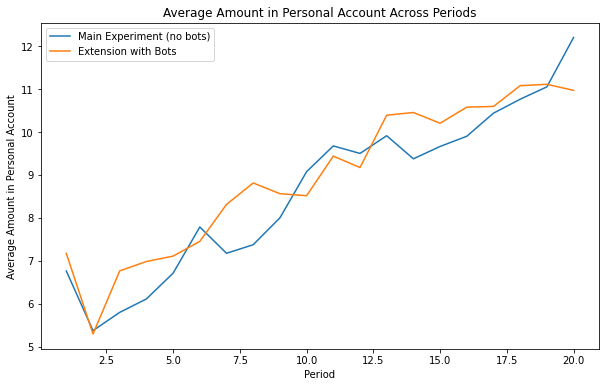

In [39]:
averages = mgpgg_shared_extension_and_main_df.groupby(['period', 'bot_bool'])['personal_account'].mean().reset_index()

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))

for key, grp in averages.groupby(['bot_bool']):
    label = 'Main Experiment (no bots)' if not key else 'Extension with Bots'
    ax.plot(grp['period'], grp['personal_account'], label=label)

ax.set_xlabel('Period')
ax.set_ylabel('Average Amount in Personal Account')
ax.legend()
plt.title('Average Amount in Personal Account Across Periods')
plt.show()


## Look at Profits
- Cooperator Bots
- Free-rider Bots
- Human Subjects

In [40]:
# Filter the original dataframe to include only rows where 'bot_bool' is True
bot_df = mgpgg_shared_extension_and_main_df[mgpgg_shared_extension_and_main_df['bot_bool'] == True]

# Verify the 'bot_bool' column only contains True values
bot_df['bot_bool'].unique()

endowment = 20

# We will define a function to calculate the profits for each bot in a given period within a session
# Define the full corrected function to calculate the profits for each bot in a given period within a session
def calculate_period_profits(group, period, bot_mapping):
    period_profits = {'period': period}
    for bot_id, bot_info in bot_mapping.items():
        # Retrieve the correct investment and share values for the blue and green groups
        blue_bot_invest = group.loc[
            group['id_in_group'] == bot_info['blue_id'], bot_info['blue_invest_col']
        ].iloc[0] if bot_info['blue_invest_col'] in group.columns else 0
        green_bot_invest = group.loc[
            group['id_in_group'] == bot_info['green_id'], bot_info['green_invest_col']
        ].iloc[0] if bot_info['green_invest_col'] in group.columns else 0
        blue_share = group.loc[
            group['id_in_group'] == bot_info['blue_id'], 'blue_indiv_share'
        ].iloc[0] if 'blue_indiv_share' in group.columns else 0
        green_share = group.loc[
            group['id_in_group'] == bot_info['green_id'], 'green_indiv_share'
        ].iloc[0] if 'green_indiv_share' in group.columns else 0

        # Calculate profit for this bot using the formula provided
        bot_profit = (endowment - (blue_bot_invest + green_bot_invest) + (blue_share + green_share))
        
        # Store the profit in the dictionary with the key as the bot's identifier
        period_profits[bot_info['profit_col']] = bot_profit

    return period_profits

# Now let's use this function to construct the whole DataFrame with the corrected profits for each bot

# Correcting the calculate_period_profits function and reconstructing the DataFrame

# Define the mapping for each bot to its corresponding investments and individual shares
bot_mapping = {
    1: {'blue_id': 1, 'green_id': 5, 'blue_invest_col': 'blue_bot_one_invest', 'green_invest_col': 'green_bot_one_invest', 'profit_col': 'B1_profit'},
    2: {'blue_id': 1, 'green_id': 6, 'blue_invest_col': 'blue_bot_two_invest', 'green_invest_col': 'green_bot_two_invest', 'profit_col': 'B2_profit'},
    3: {'blue_id': 3, 'green_id': 5, 'blue_invest_col': 'blue_bot_three_invest', 'green_invest_col': 'green_bot_three_invest', 'profit_col': 'B3_profit'},
    4: {'blue_id': 3, 'green_id': 6, 'blue_invest_col': 'blue_bot_four_invest', 'green_invest_col': 'green_bot_four_invest', 'profit_col': 'B4_profit'},
    5: {'blue_id': 2, 'green_id': 1, 'blue_invest_col': 'blue_bot_five_invest', 'green_invest_col': 'green_bot_five_invest', 'profit_col': 'B5_profit'},
    6: {'blue_id': 2, 'green_id': 2, 'blue_invest_col': 'blue_bot_six_invest', 'green_invest_col': 'green_bot_six_invest', 'profit_col': 'B6_profit'},
    7: {'blue_id': 4, 'green_id': 1, 'blue_invest_col': 'blue_bot_seven_invest', 'green_invest_col': 'green_bot_seven_invest', 'profit_col': 'B7_profit'},
    8: {'blue_id': 4, 'green_id': 2, 'blue_invest_col': 'blue_bot_eight_invest', 'green_invest_col': 'green_bot_eight_invest', 'profit_col': 'B8_profit'},
}

# Calculate the profits for all bots for each period in each session
all_bot_profits_corrected = pd.DataFrame()

# Iterate over each session and period to calculate profits
for (session_code, period), period_group in bot_df.groupby(['session_code', 'period']):
    # Calculate the profits using the corrected function
    period_profits = calculate_period_profits(period_group, period, bot_mapping)
    period_profits['session_code'] = session_code  # Add session code to the profits
    all_bot_profits_corrected = all_bot_profits_corrected.append(period_profits, ignore_index=True)

# Check the corrected profit for B1 in period 1 for the first session
all_bot_profits_corrected[all_bot_profits_corrected['session_code'] == 'p40h0u4h'].head()


/var/folders/ry/bf84d3cd54jctn_cwy_5666m0000gn/T/ipykernel_45543/3836714215.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_bot_profits_corrected = all_bot_profits_corrected.append(period_profits, ignore_index=True)
/var/folders/ry/bf84d3cd54jctn_cwy_5666m0000gn/T/ipykernel_45543/3836714215.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_bot_profits_corrected = all_bot_profits_corrected.append(period_profits, ignore_index=True)
/var/folders/ry/bf84d3cd54jctn_cwy_5666m0000gn/T/ipykernel_45543/3836714215.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_bot_profits_corrected = all_bot_profits_corrected.append(period_profits, ignore_index=True)
/var/folders/ry/bf84d3cd54jctn_cwy_5666m0000gn/T/ipykernel

,period,B1_profit,B2_profit,B3_profit,B4_profit,B5_profit,B6_profit,B7_profit,B8_profit,session_code
120,1,34.0,38.0,29.0,35.0,45.0,44.0,40.0,39.0,p40h0u4h
121,2,34.0,34.0,32.0,34.0,44.0,45.0,42.0,43.0,p40h0u4h
122,3,28.0,30.0,33.0,35.0,41.0,42.0,46.0,47.0,p40h0u4h
123,4,31.0,30.0,34.0,33.0,41.0,40.0,44.0,43.0,p40h0u4h
124,5,35.0,37.0,31.0,33.0,47.0,45.0,41.0,39.0,p40h0u4h


/var/folders/ry/bf84d3cd54jctn_cwy_5666m0000gn/T/ipykernel_45543/2692595140.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bot_avg_payoffs = all_bot_profits_corrected.mean().drop(['period']).to_frame(name='average_payoff')


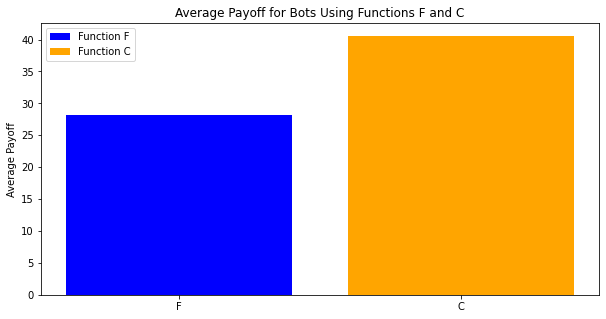

In [41]:
# First, we'll calculate the average payoff for each bot across all sessions and periods
bot_avg_payoffs = all_bot_profits_corrected.mean().drop(['period']).to_frame(name='average_payoff')

# Now, we'll create separate DataFrames for bots using function F and function C
bots_F = bot_avg_payoffs.loc[['B1_profit', 'B2_profit', 'B3_profit', 'B4_profit']]
bots_C = bot_avg_payoffs.loc[['B5_profit', 'B6_profit', 'B7_profit', 'B8_profit']]

# Calculate the average payoffs for both groups
avg_payoff_F = bots_F['average_payoff'].mean()
avg_payoff_C = bots_C['average_payoff'].mean()

# Plot the average payoffs
plt.figure(figsize=(10, 5))
plt.bar('F', avg_payoff_F, color='blue', label='Function F')
plt.bar('C', avg_payoff_C, color='orange', label='Function C')
plt.title('Average Payoff for Bots Using Functions F and C')
plt.ylabel('Average Payoff')
plt.legend()
plt.show()

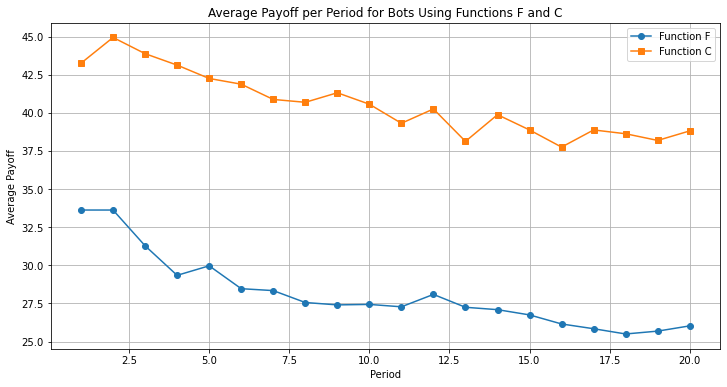

In [42]:
# Calculate the average payoff per period for F and C type bots across all sessions
# First, we'll group the data by period
grouped_by_period = all_bot_profits_corrected.groupby('period')

# Initialize two lists to store the average payoffs for each period for F and C type bots
average_payoffs_F = []
average_payoffs_C = []

# Calculate the average for each period
for period, group in grouped_by_period:
    average_payoff_F = group[['B1_profit', 'B2_profit', 'B3_profit', 'B4_profit']].mean(axis=1).mean()
    average_payoffs_F.append(average_payoff_F)

    average_payoff_C = group[['B5_profit', 'B6_profit', 'B7_profit', 'B8_profit']].mean(axis=1).mean()
    average_payoffs_C.append(average_payoff_C)

# Now let's plot these averages over the periods
periods = grouped_by_period.groups.keys()

plt.figure(figsize=(12, 6))
plt.plot(periods, average_payoffs_F, label='Function F', marker='o')
plt.plot(periods, average_payoffs_C, label='Function C', marker='s')
plt.title('Average Payoff per Period for Bots Using Functions F and C')
plt.xlabel('Period')
plt.ylabel('Average Payoff')
plt.legend()
plt.grid(True)
plt.show()

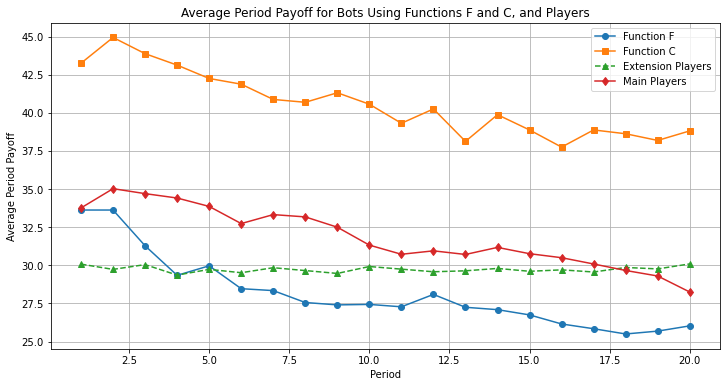

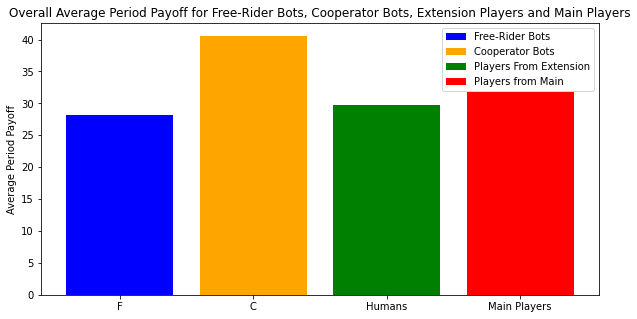

In [43]:
human_df = mgpgg_shared_extension_and_main_df[mgpgg_shared_extension_and_main_df['bot_bool'] == True]

main_df = mgpgg_shared_extension_and_main_df[mgpgg_shared_extension_and_main_df['bot_bool'] == False]
# For the accurate human player average payoff per period, we'll use the 'period_payoff' column
# Calculate the average 'period_payoff' for human players per period across all sessions
human_period_payoffs = human_df.groupby('period')['period_payoff'].mean()

main_period_payoffs = main_df.groupby('period')['period_payoff'].mean()

# Update the line graph to include the average human player 'period_payoff' per period
plt.figure(figsize=(12, 6))
plt.plot(periods, average_payoffs_F, label='Function F', marker='o')
plt.plot(periods, average_payoffs_C, label='Function C', marker='s')
plt.plot(human_period_payoffs.index, human_period_payoffs.values, label='Extension Players', marker='^', linestyle='--')
plt.plot(main_period_payoffs.index, main_period_payoffs.values, label='Main Players', marker='d', linestyle='-' )
plt.title('Average Period Payoff for Bots Using Functions F and C, and Players')
plt.xlabel('Period')
plt.ylabel('Average Period Payoff')
plt.legend()
plt.grid(True)
plt.show()

# For the bar chart, we'll include the average human player 'period_payoff' across all periods
# Calculate the overall average 'period_payoff' for human players
human_overall_avg_period_payoff = human_period_payoffs.mean()

main_overall_avg_period_payoff = main_period_payoffs.mean()

# Plotting the updated bar chart
plt.figure(figsize=(10, 5))
plt.bar('F', avg_payoff_F, color='blue', label='Free-Rider Bots')
plt.bar('C', avg_payoff_C, color='orange', label='Cooperator Bots')
plt.bar('Humans', human_overall_avg_period_payoff, color='green', label='Players From Extension')
plt.bar('Main Players', main_overall_avg_period_payoff, color='red', label='Players from Main')
plt.title('Overall Average Period Payoff for Free-Rider Bots, Cooperator Bots, Extension Players and Main Players')
plt.ylabel('Average Period Payoff')
plt.legend()
plt.show()

## Survey Responses (Extension)

In [44]:
#TODO